In [132]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, plot_confusion_matrix, classification_report

import seaborn as sns
from matplotlib import pyplot as plt
#from functions_Library import build_and_eval_model

%matplotlib inline

In [19]:
df = pd.read_csv('https://raw.githubusercontent.com/DSEI21000-S21/project-mushroom-data-classification/main/Data/Agaricus_Lepiota_Labeled_FINAL.csv')

In [23]:
df

,Edible?,Cap-shape,Cap-surface,Cap-color,Bruises?,Odor,Gill-attacment,Gill-spacing,Gill-size,Gill-color,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-Type,Veil-Color,Ring-number,Ring-Type,Spore-print-color,Population,Habitat,Species
0,p,x,f,n,f,n,f,w,n,w,...,n,n,p,w,o,e,w,y,l,Lepiota acutesquamosa
1,NaN,f,y,c,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,s,NaN,Lepiota acutesquamosa
2,NaN,k,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lepiota acutesquamosa
3,e,k,s,p,t,n,f,c,b,w,...,w,w,p,w,o,e,w,c,w,Lepiota americana
4,NaN,x,y,c,NaN,NaN,NaN,NaN,NaN,e,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,y,NaN,Lepiota americana
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,u,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,n,NaN,Agaricus subrutilescens
78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,h,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Agaricus subrutilescens
79,p,x,s,w,t,f,f,c,b,w,...,w,w,p,w,o,f,h,s,u,Agaricus xanthodermus
80,NaN,f,NaN,g,NaN,NaN,NaN,NaN,NaN,p,...,NaN,NaN,NaN,NaN,NaN,p,NaN,v,p,Agaricus xanthodermus


In [48]:
# Check how many of each species our synthesized data conatains
df.Species.value_counts()

Lepiota americana            5
Lepiota lutea                4
Lepiota clypeolaria          4
Agaricus arvensis            4
Lepiota procera              4
Agaricus haemorrhoidarius    4
Agaricus hondensis           4
Lepiota cepaestipes          4
Agaricus campestris          4
Lepiota cristata             4
Lepiota rachodes             4
Agaricus subrutilescens      4
Agaricus abruptibulbus       3
Agaricus augustus            3
Agaricus meleagris           3
Agaricus bitorquis           3
Lepiota artodisca            3
Lepiota josserandi           3
Agaricus xanthodermus        3
Lepiota acutesquamosa        3
Agaricus californicus        3
Lepiota naucina              3
Lepiota rubrotincta          3
Name: Species, dtype: int64

In [55]:
len(df.Species.value_counts())

23

In [149]:
samples_per_species = 350

In [150]:
species = list(set(df.iloc[:,-1].values));

In [151]:
df_bin = [];

for sp in species:
    temp = df.loc[df.iloc[:,-1] == sp,:] 
    mask = temp.notna()
    dummy = pd.DataFrame(list(range(samples_per_species)))    
        
    for ft in df.columns:
        col = [];
            
        if (mask.loc[:,ft].values.sum() > 0):  
            bin_val = temp.loc[mask.loc[:,ft]==True,ft]
        
            for i in range(samples_per_species):
                rsample = bin_val.sample(n=1,replace = True).values[0]
                col.append([rsample])
                
        else:
            
            for i in range(samples_per_species):
                col.append([np.nan])
                
        dummy = pd.concat([dummy,pd.DataFrame(col)],axis=1)
                
    chunk = dummy.iloc[:,1:np.size(dummy.columns)]
    df_bin.append(chunk)
                
    
out = pd.concat(df_bin)
out.columns = df.columns
df.dtypes
out.head()

,Edible?,Cap-shape,Cap-surface,Cap-color,Bruises?,Odor,Gill-attacment,Gill-spacing,Gill-size,Gill-color,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-Type,Veil-Color,Ring-number,Ring-Type,Spore-print-color,Population,Habitat,Species
0,p,f,s,w,f,p,f,c,n,w,...,w,w,p,w,o,e,w,s,p,Lepiota cristata
1,p,x,y,w,f,p,f,c,n,p,...,p,w,p,w,o,e,w,s,d,Lepiota cristata
2,p,x,s,w,f,s,f,c,n,p,...,p,p,p,w,o,e,w,s,d,Lepiota cristata
3,p,f,s,w,f,s,f,c,n,p,...,p,w,p,w,o,e,w,s,d,Lepiota cristata
4,p,x,s,w,f,f,f,c,n,p,...,w,w,p,w,o,e,w,s,l,Lepiota cristata


In [152]:
out.tail()

,Edible?,Cap-shape,Cap-surface,Cap-color,Bruises?,Odor,Gill-attacment,Gill-spacing,Gill-size,Gill-color,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-Type,Veil-Color,Ring-number,Ring-Type,Spore-print-color,Population,Habitat,Species
345,p,f,s,w,NaN,p,f,c,n,n,...,w,w,p,w,o,p,n,s,u,Agaricus californicus
346,p,x,s,w,NaN,p,f,c,n,p,...,w,w,p,w,o,p,n,v,g,Agaricus californicus
347,p,f,y,w,NaN,p,f,c,n,w,...,w,w,p,w,o,p,n,s,g,Agaricus californicus
348,p,x,y,n,NaN,p,f,c,n,n,...,w,w,p,w,o,p,n,s,u,Agaricus californicus
349,p,f,s,w,NaN,p,f,c,n,p,...,w,w,p,w,o,p,n,s,u,Agaricus californicus


In [153]:
out.isnull().sum()

Edible?                        0
Cap-shape                      0
Cap-surface                  350
Cap-color                      0
Bruises?                    1750
Odor                        1750
Gill-attacment                 0
Gill-spacing                   0
Gill-size                      0
Gill-color                     0
Stalk-shape                    0
Stalk-root                  6650
Stalk-surface-above-ring       0
Stalk-surface-below-ring       0
Stalk-color-above-ring         0
Stalk-color-below-ring         0
Veil-Type                      0
Veil-Color                     0
Ring-number                    0
Ring-Type                      0
Spore-print-color              0
Population                   700
Habitat                        0
Species                        0
dtype: int64

In [154]:
len(out)

8050

In [155]:
out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8050 entries, 0 to 349
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Edible?                   8050 non-null   object
 1   Cap-shape                 8050 non-null   object
 2   Cap-surface               7700 non-null   object
 3   Cap-color                 8050 non-null   object
 4   Bruises?                  6300 non-null   object
 5   Odor                      6300 non-null   object
 6   Gill-attacment            8050 non-null   object
 7   Gill-spacing              8050 non-null   object
 8   Gill-size                 8050 non-null   object
 9   Gill-color                8050 non-null   object
 10  Stalk-shape               8050 non-null   object
 11  Stalk-root                1400 non-null   object
 12  Stalk-surface-above-ring  8050 non-null   object
 13  Stalk-surface-below-ring  8050 non-null   object
 14  Stalk-color-above-ring   

In [156]:
out.duplicated().sum()

4550

In [157]:
# Having target data as 'Edible?'

X = out.drop(['Edible?','Bruises?','Stalk-root'], axis=1)

In [158]:
X

,Cap-shape,Cap-surface,Cap-color,Odor,Gill-attacment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,Stalk-surface-above-ring,...,Stalk-color-above-ring,Stalk-color-below-ring,Veil-Type,Veil-Color,Ring-number,Ring-Type,Spore-print-color,Population,Habitat,Species
0,f,s,w,p,f,c,n,w,e,k,...,w,w,p,w,o,e,w,s,p,Lepiota cristata
1,x,y,w,p,f,c,n,p,e,s,...,p,w,p,w,o,e,w,s,d,Lepiota cristata
2,x,s,w,s,f,c,n,p,e,s,...,p,p,p,w,o,e,w,s,d,Lepiota cristata
3,f,s,w,s,f,c,n,p,e,k,...,p,w,p,w,o,e,w,s,d,Lepiota cristata
4,x,s,w,f,f,c,n,p,e,s,...,w,w,p,w,o,e,w,s,l,Lepiota cristata
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,f,s,w,p,f,c,n,n,e,s,...,w,w,p,w,o,p,n,s,u,Agaricus californicus
346,x,s,w,p,f,c,n,p,e,s,...,w,w,p,w,o,p,n,v,g,Agaricus californicus
347,f,y,w,p,f,c,n,w,e,s,...,w,w,p,w,o,p,n,s,g,Agaricus californicus
348,x,y,n,p,f,c,n,n,e,s,...,w,w,p,w,o,p,n,s,u,Agaricus californicus


In [159]:
X = pd.get_dummies(X, drop_first=True)

In [160]:
X

,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-surface_g,Cap-surface_s,Cap-surface_y,Cap-color_c,Cap-color_e,...,Species_Lepiota artodisca,Species_Lepiota cepaestipes,Species_Lepiota clypeolaria,Species_Lepiota cristata,Species_Lepiota josserandi,Species_Lepiota lutea,Species_Lepiota naucina,Species_Lepiota procera,Species_Lepiota rachodes,Species_Lepiota rubrotincta
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
347,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
348,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
y = out['Edible?']

In [162]:
y

0      p
1      p
2      p
3      p
4      p
      ..
345    p
346    p
347    p
348    p
349    p
Name: Edible?, Length: 8050, dtype: object

In [163]:
# A function to plug in our models and check for accuracy

def build_and_eval_model(model, X, y, random_state=23):
    print("Running report for model", model)

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.25, random_state=random_state, stratify=y)    
    
    # Fit our model.
    model.fit(X_train, y_train)
    
    # Get the accuracy
    accuracy = model.score(X_test, y_test)
    print("\n\nAccuracy %f" % accuracy)
    
    
    # Make new predictions
    y_pred = model.predict(X_test)
    
    
    # Print the classification report. 
    print(metrics.classification_report(y_test, y_pred))
    
        
    # Plot the confusion matrix
    fig, ax = plt.subplots(figsize=(15,15))
    
    metrics.plot_confusion_matrix(estimator=model, 
                                  X=X_test,
                                  xticks_rotation='vertical',
                                  y_true=y_test, 
                                  ax=ax)

    # Return the fitted model. 
    return model

In [164]:
metrics.confusion_matrix??

Running report for model LogisticRegression()


Accuracy 1.000000
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       875
           p       1.00      1.00      1.00      1138

    accuracy                           1.00      2013
   macro avg       1.00      1.00      1.00      2013
weighted avg       1.00      1.00      1.00      2013



LogisticRegression()

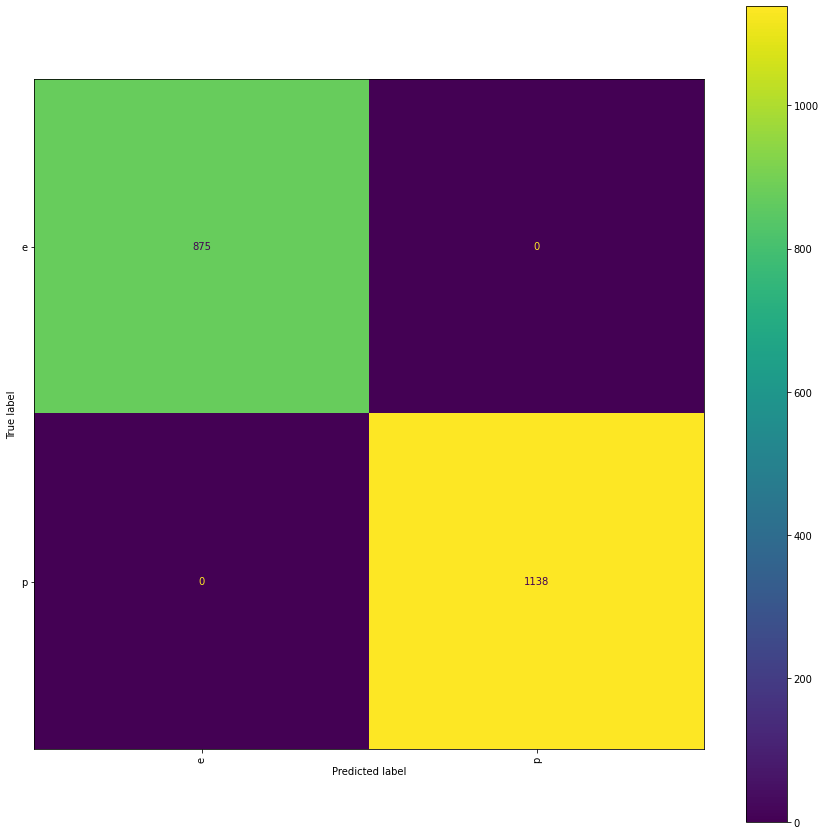

In [165]:
log = LogisticRegression()
build_and_eval_model(log, X, y)

Running report for model RandomForestClassifier()


Accuracy 1.000000
              precision    recall  f1-score   support

           e       1.00      1.00      1.00       875
           p       1.00      1.00      1.00      1138

    accuracy                           1.00      2013
   macro avg       1.00      1.00      1.00      2013
weighted avg       1.00      1.00      1.00      2013



RandomForestClassifier()

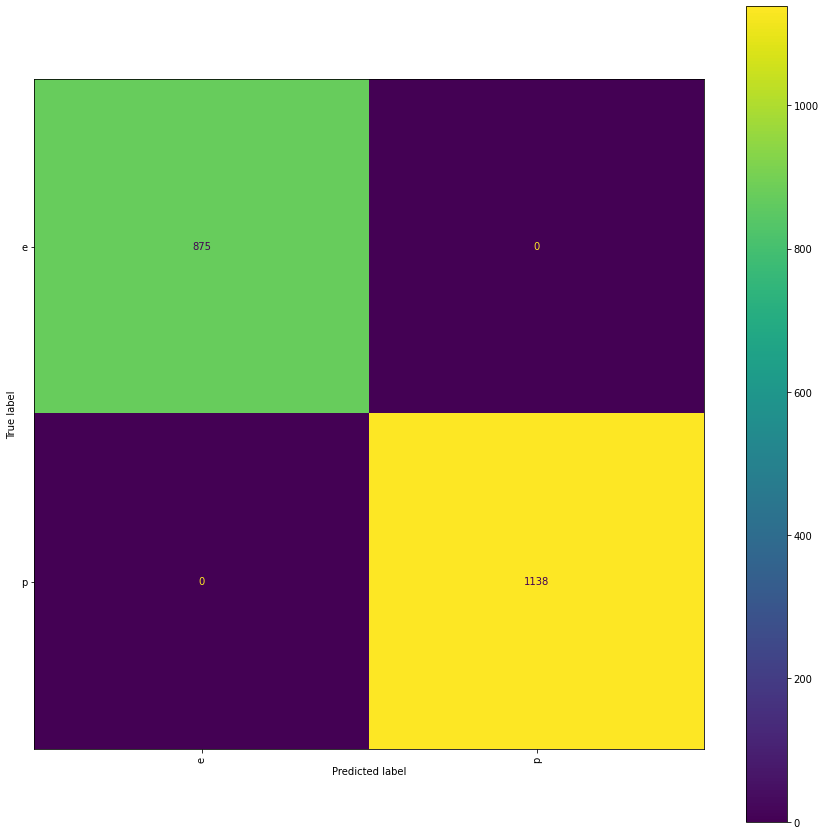

In [166]:
rf_model = RandomForestClassifier()
build_and_eval_model(rf_model, X, y)

In [167]:
selected_features = X.columns
my_dict = {'feature_importance': rf_model.feature_importances_,
           'feature':selected_features }
feature_imp = pd.DataFrame.from_dict( my_dict ).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
25,0.087298,Gill-size_n
16,0.064401,Odor_f
63,0.056599,Spore-print-color_w
51,0.049025,Stalk-color-below-ring_w
24,0.028826,Gill-spacing_w
...,...,...
21,0.000314,Odor_s
85,0.000269,Species_Lepiota acutesquamosa
44,0.000134,Stalk-color-above-ring_p
5,0.000000,Cap-surface_g


In [168]:
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [170]:
model_C = CategoricalNB()
clf = model_C.fit(X_train, y_train)

In [171]:
pred_labels = model_C.predict_proba(X_test)

In [172]:
score = model_C.score(X_test,y_test)

In [173]:
print("Model Accuracy: %f" % score)

Model Accuracy: 1.000000


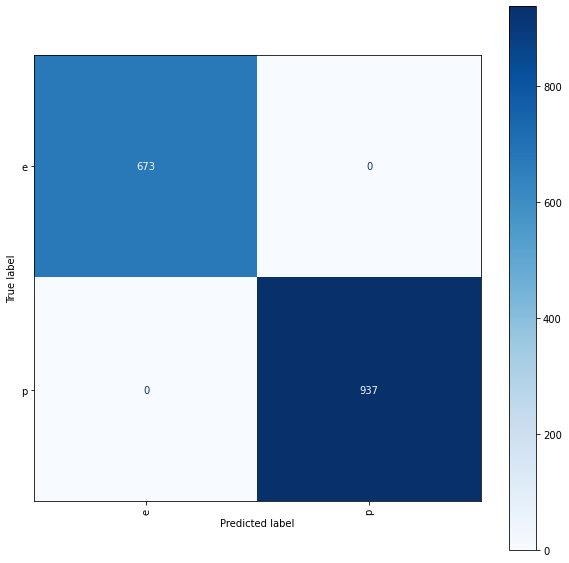

In [174]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model_C, X_test, y_test,
                             display_labels=model_C.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [175]:
# Having target data as 'Species'
X = out.drop(['Species','Bruises?','Stalk-root'], axis=1)

In [176]:
X

,Edible?,Cap-shape,Cap-surface,Cap-color,Odor,Gill-attacment,Gill-spacing,Gill-size,Gill-color,Stalk-shape,...,Stalk-surface-below-ring,Stalk-color-above-ring,Stalk-color-below-ring,Veil-Type,Veil-Color,Ring-number,Ring-Type,Spore-print-color,Population,Habitat
0,p,f,s,w,p,f,c,n,w,e,...,s,w,w,p,w,o,e,w,s,p
1,p,x,y,w,p,f,c,n,p,e,...,k,p,w,p,w,o,e,w,s,d
2,p,x,s,w,s,f,c,n,p,e,...,k,p,p,p,w,o,e,w,s,d
3,p,f,s,w,s,f,c,n,p,e,...,k,p,w,p,w,o,e,w,s,d
4,p,x,s,w,f,f,c,n,p,e,...,k,w,w,p,w,o,e,w,s,l
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,p,f,s,w,p,f,c,n,n,e,...,s,w,w,p,w,o,p,n,s,u
346,p,x,s,w,p,f,c,n,p,e,...,s,w,w,p,w,o,p,n,v,g
347,p,f,y,w,p,f,c,n,w,e,...,s,w,w,p,w,o,p,n,s,g
348,p,x,y,n,p,f,c,n,n,e,...,s,w,w,p,w,o,p,n,s,u


In [177]:
X = pd.get_dummies(X, drop_first=True)

In [178]:
X

,Edible?_p,Cap-shape_c,Cap-shape_f,Cap-shape_k,Cap-shape_s,Cap-shape_x,Cap-surface_g,Cap-surface_s,Cap-surface_y,Cap-color_c,...,Population_n,Population_s,Population_v,Population_y,Habitat_g,Habitat_l,Habitat_m,Habitat_p,Habitat_u,Habitat_w
0,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345,1,0,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
346,1,0,0,0,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
347,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,1,0,0,0,0,0
348,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0


In [179]:
y = out['Species']

In [180]:
y

0           Lepiota cristata
1           Lepiota cristata
2           Lepiota cristata
3           Lepiota cristata
4           Lepiota cristata
               ...          
345    Agaricus californicus
346    Agaricus californicus
347    Agaricus californicus
348    Agaricus californicus
349    Agaricus californicus
Name: Species, Length: 8050, dtype: object

In [181]:
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [183]:
model_C = CategoricalNB()
clf = model_C.fit(X_train, y_train)

In [184]:
pred_labels = model_C.predict_proba(X_test)

In [185]:
score = model_C.score(X_test,y_test)

In [186]:
print("Model Accuracy: %f" % score)

Model Accuracy: 0.999379


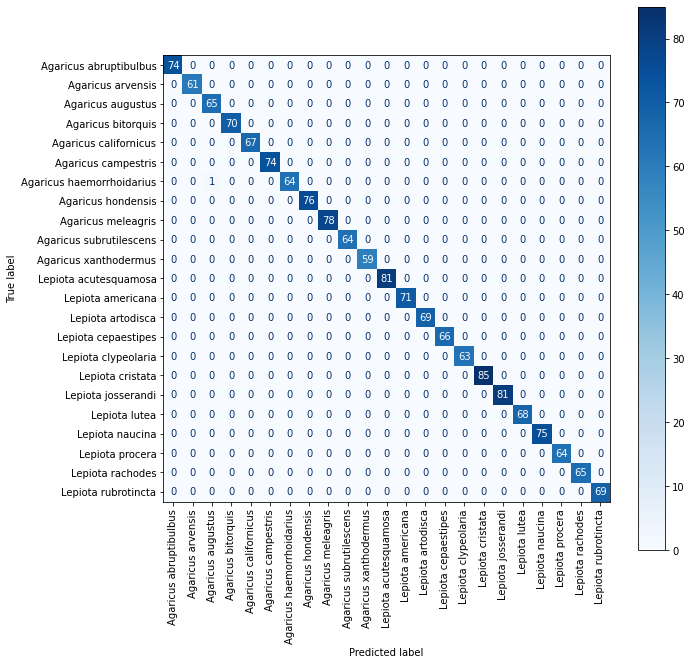

In [187]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model_C, X_test, y_test,
                             display_labels=model_C.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

Running report for model LogisticRegression()


/Users/imanabakoyas/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(




Accuracy 0.999503
                           precision    recall  f1-score   support

   Agaricus abruptibulbus       1.00      1.00      1.00        87
        Agaricus arvensis       1.00      1.00      1.00        87
        Agaricus augustus       0.99      1.00      0.99        87
       Agaricus bitorquis       1.00      1.00      1.00        88
    Agaricus californicus       1.00      1.00      1.00        87
      Agaricus campestris       1.00      1.00      1.00        87
Agaricus haemorrhoidarius       1.00      0.99      0.99        88
       Agaricus hondensis       1.00      1.00      1.00        88
       Agaricus meleagris       1.00      1.00      1.00        88
  Agaricus subrutilescens       1.00      1.00      1.00        88
    Agaricus xanthodermus       1.00      1.00      1.00        88
    Lepiota acutesquamosa       1.00      1.00      1.00        88
        Lepiota americana       1.00      1.00      1.00        88
        Lepiota artodisca       1.00     

LogisticRegression()

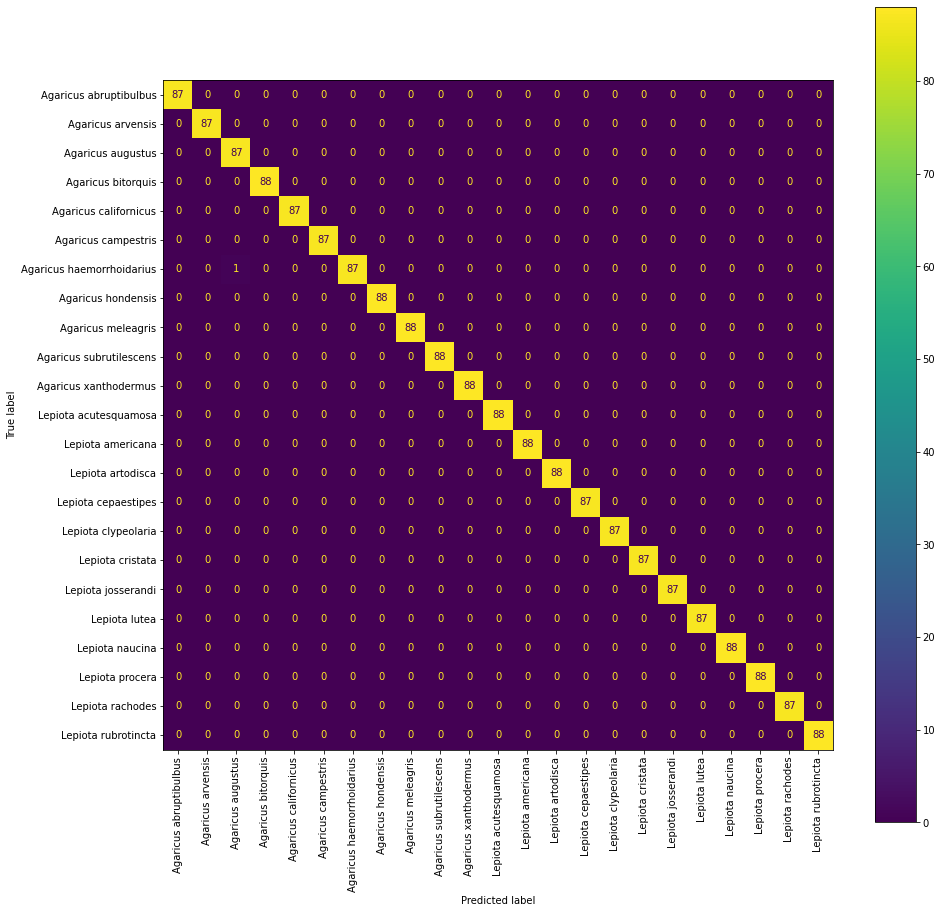

In [188]:
build_and_eval_model(log, X, y)

Running report for model RandomForestClassifier()


Accuracy 0.999503
                           precision    recall  f1-score   support

   Agaricus abruptibulbus       1.00      1.00      1.00        87
        Agaricus arvensis       1.00      1.00      1.00        87
        Agaricus augustus       0.99      1.00      0.99        87
       Agaricus bitorquis       1.00      1.00      1.00        88
    Agaricus californicus       1.00      1.00      1.00        87
      Agaricus campestris       1.00      1.00      1.00        87
Agaricus haemorrhoidarius       1.00      0.99      0.99        88
       Agaricus hondensis       1.00      1.00      1.00        88
       Agaricus meleagris       1.00      1.00      1.00        88
  Agaricus subrutilescens       1.00      1.00      1.00        88
    Agaricus xanthodermus       1.00      1.00      1.00        88
    Lepiota acutesquamosa       1.00      1.00      1.00        88
        Lepiota americana       1.00      1.00      1.00  

RandomForestClassifier()

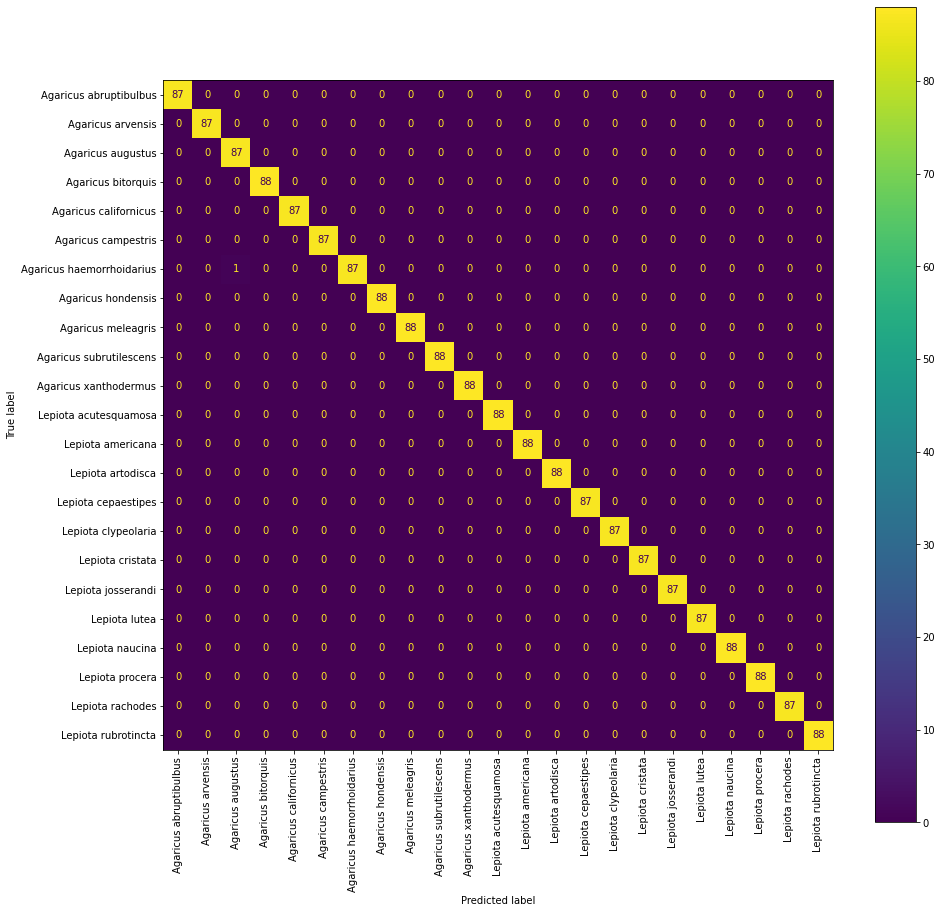

In [189]:
build_and_eval_model(rf_model, X, y)

In [190]:
enc = OrdinalEncoder()
X = enc.fit_transform(X)

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [192]:
model_C = CategoricalNB()
clf = model_C.fit(X_train, y_train)

In [193]:
pred_labels = model_C.predict_proba(X_test)

In [194]:
score = model_C.score(X_test,y_test)

In [195]:
print("Model Accuracy: %f" % score)

Model Accuracy: 0.999379


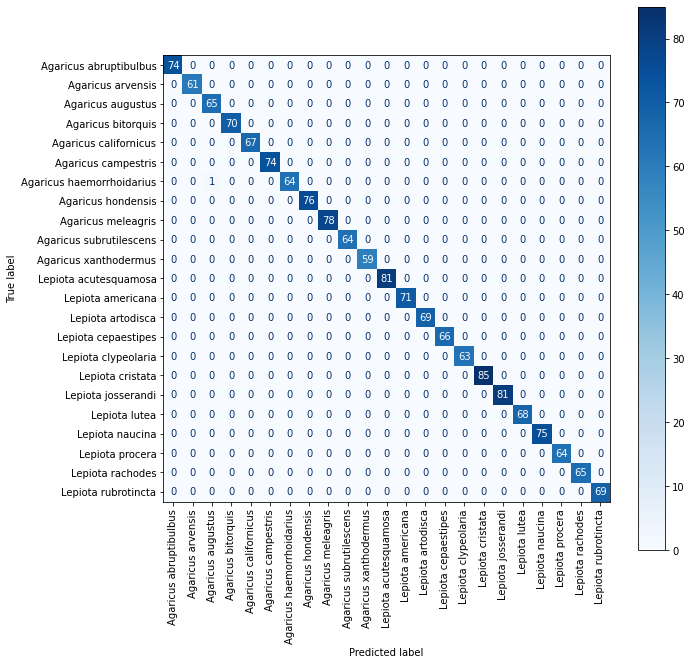

In [196]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = plot_confusion_matrix(model_C, X_test, y_test,
                             display_labels=model_C.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp